In [1]:
# !pip install imagehash > /dev/null

In [1]:
import sys
sys.path.append("..")

%matplotlib inline

In [2]:
import os
from collections import Counter
from typing import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set_style("whitegrid")

In [3]:
from dataclasses import dataclass


@dataclass
class InputPath:
    _prefix: str = "../input"
    train_images: str = f"{_prefix}/christ-train-imgs.npz"
    train_labels: str = f"{_prefix}/christ-train-labels.npz"
    test_images: str = f"{_prefix}/christ-test-imgs.npz"
        
        
def load_npz(path: str) -> np.array:
    x = np.load(path)["arr_0"]
    print(f"{os.path.basename(path)}: {x.shape}")
    return x

In [4]:
train = load_npz(InputPath.train_images)
train_labels = load_npz(InputPath.train_labels)
test = load_npz(InputPath.test_images)

christ-train-imgs.npz: (654, 224, 224, 3)
christ-train-labels.npz: (654,)
christ-test-imgs.npz: (497, 224, 224, 3)


## EDA - metadata

### Train

/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


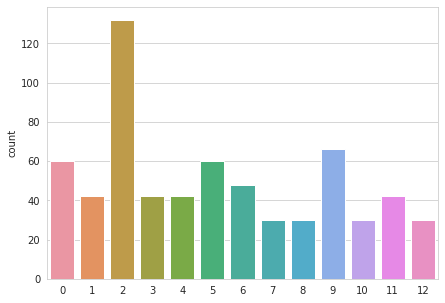

In [5]:
plt.figure(figsize=(7, 5))
sns.countplot(train_labels)
plt.show()

In [22]:
_df = pd.DataFrame.from_dict({k: [v] for k, v in dict(Counter(train_labels)).items()}).T
_df.columns = ["num"]
_df = _df.sort_index()
_df = _df.assign(pct=np.round(_df["num"]/_df["num"].sum(), 3))
_df

,num,pct
0,60,0.092
1,42,0.064
2,132,0.202
3,42,0.064
4,42,0.064
5,60,0.092
6,48,0.073
7,30,0.046
8,30,0.046
9,66,0.101


In [7]:
np.sum(train_labels == 2) / len(train_labels) * 100

20.18348623853211

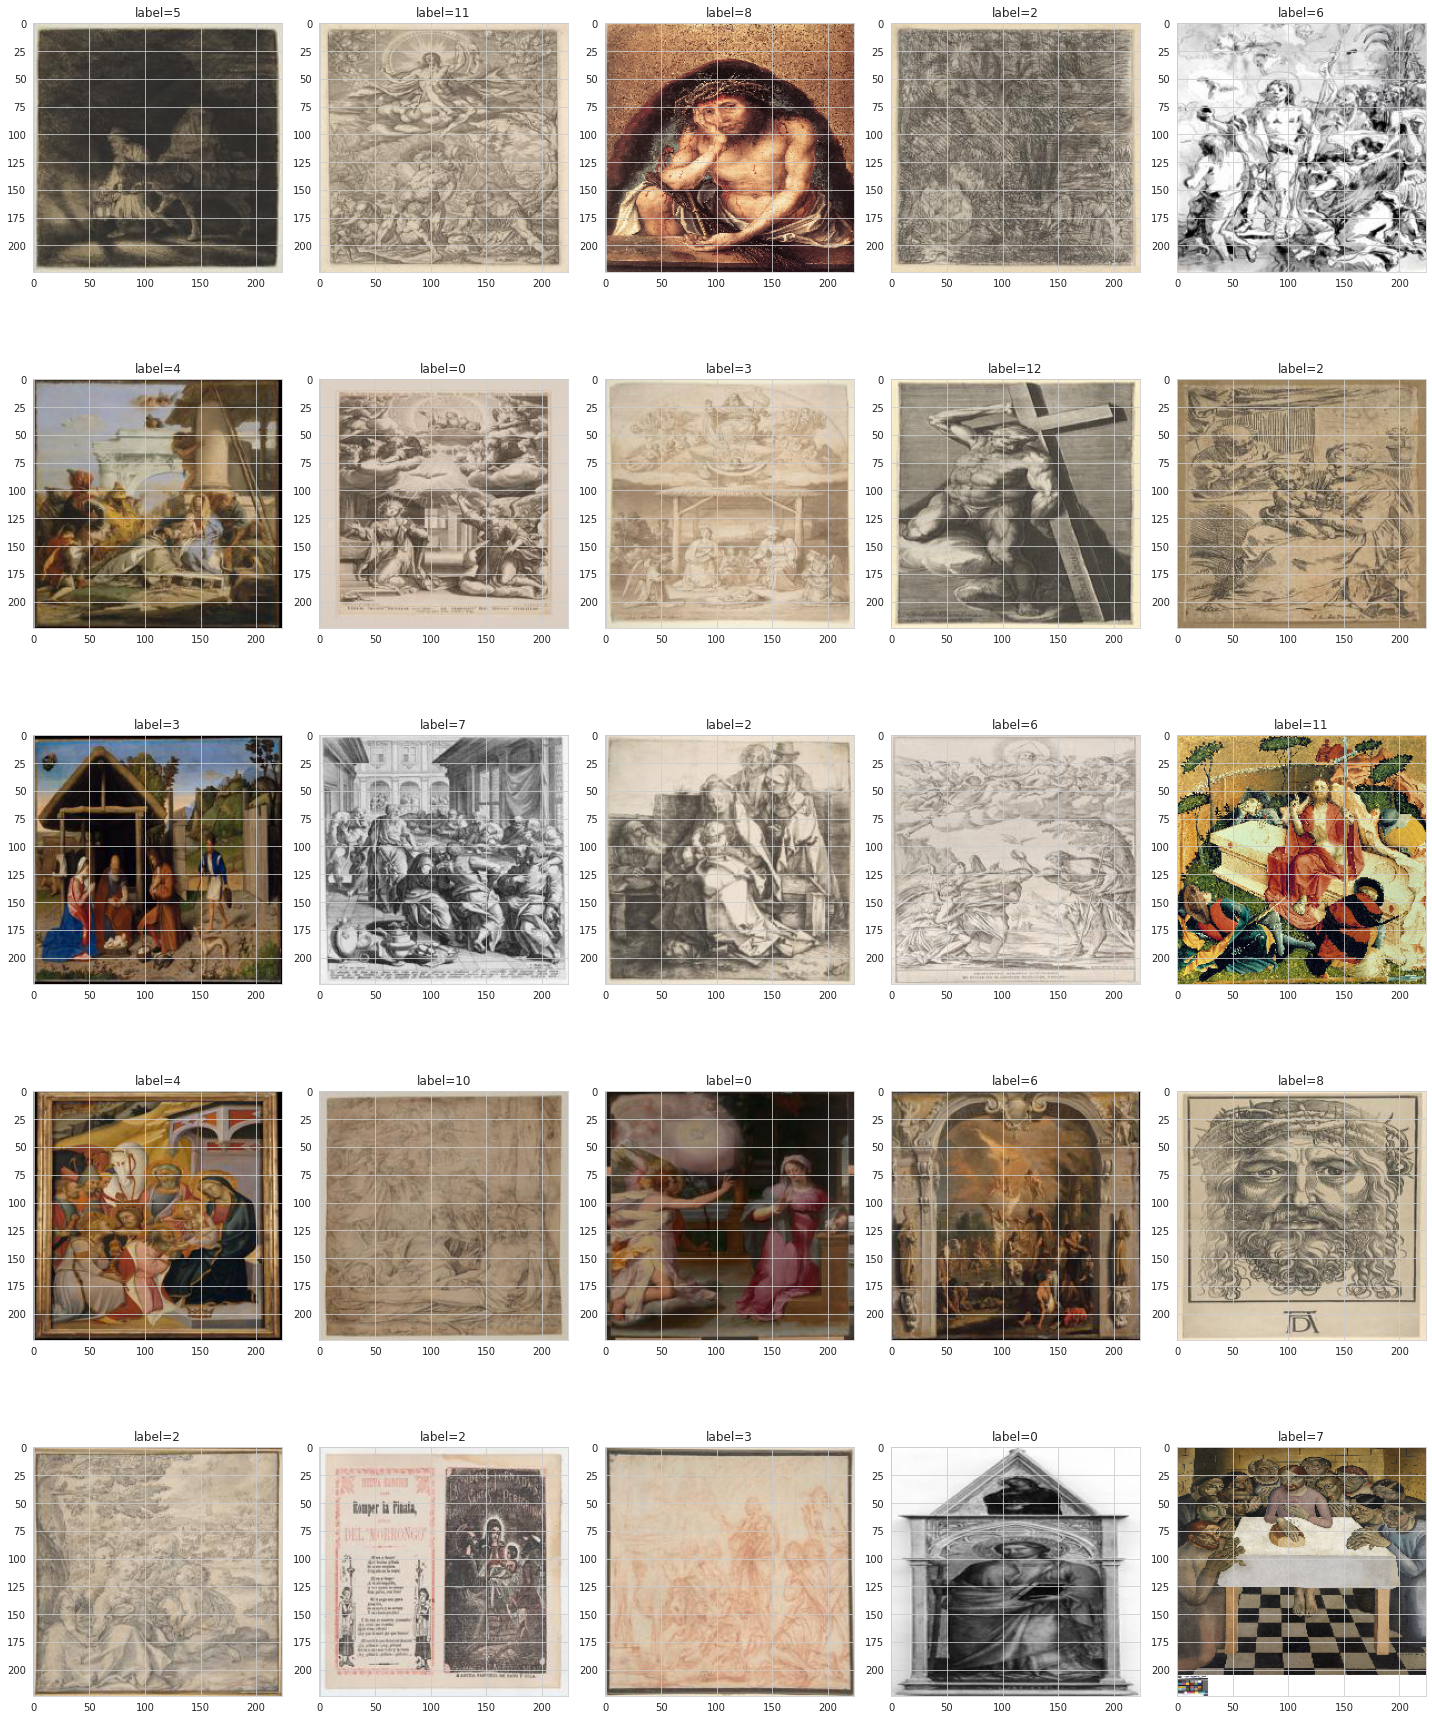

In [44]:
n = 5
c = 5
fig, axes = plt.subplots(n, c, figsize=(n*4, c*5))
for i in range(n * c):
    j = i // c
    k = i % c
    axes[j, k].imshow(train[i])
    axes[j, k].set_title(f"label={train_labels[i]}")
plt.tight_layout()
plt.show()
print("\n")